# 1-Clustering-Müzik Türlerini Kümeleme

<img src="genres.jpg">

Python kullanarak bu tür bir görevi gerçekleştirmek için aşağıdaki adımları izleyebilirsiniz:

1. **Veri Toplama**: İlk adım, analiz için kullanacağınız müzik özelliklerini içeren bir veri kümesi toplamak veya oluşturmak olacaktır. Bu özellikler, örneğin tempo, tonal özellikler, ritim, enstrümantasyon gibi müzikle ilgili özellikler olabilir. Bu verileri kullanarak her müziği bir dizi sayısal özellikle temsil edebilirsiniz.

2. **Veri Temizleme ve Dönüştürme**: Topladığınız veya bulduğunuz verileri temizlemek ve uygun bir formata dönüştürmek önemlidir. Eksik veya anlamsız verileri ele almalı ve sayısal verilere dönüştürmelisiniz.

3. **Veriyi Standartlaştırma**: Verileri standartlaştırmak, farklı özelliklerin aynı ölçekte olduğundan emin olmak için önemlidir. Özellikle kümeleme algoritmaları için önemlidir.

4. **Kümeleme Algoritmasını Seçme**: Müzik türlerini kümelemek için farklı algoritmaları deneyebilirsiniz. K-Means, Hierarchical Clustering, DBSCAN gibi popüler kümeleme algoritmaları arasından birini seçebilirsiniz.

5. **Kümeleme Analizi**: Seçtiğiniz algoritmayı kullanarak verileri kümeleyin. Her bir müziği belirli bir kümeyle ilişkilendireceksiniz.

6. **Sonuçları Değerlendirme**: Kümeleme sonuçlarını değerlendirmek için farklı metrikleri kullanabilirsiniz. Örneğin, her kümenin ne kadar homojen olduğunu veya küme merkezlerinin ne kadar uzak olduğunu inceleyebilirsiniz.

7. **Sonuçları Görselleştirme**: Kümeleme sonuçlarını görselleştirmek, hangi müzik türlerinin bir araya geldiğini veya hangi özelliklerin önemli olduğunu daha iyi anlamanıza yardımcı olabilir.

8. **Sonuçları Yorumlama**: Elde ettiğiniz sonuçları müzik türleri açısından yorumlayın. Hangi müzik türlerinin benzer özelliklere sahip olduğunu ve bu kümeleme analizinin müzik sınıflandırması veya önerileri için nasıl kullanılabileceğini düşünün.

Bu adımları takip ederek, müzik türlerini kümelemek için bir makine öğrenimi uygulaması geliştirebilirsiniz. İhtiyacınıza göre bu adımları daha fazla ayrıntıyla ve kod örnekleriyle inceleyebilirsiniz. Başarılar dilerim! Eğer daha fazla yardım veya öneriye ihtiyacınız varsa, lütfen sormaktan çekinmeyin.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
import sqlite3
from sqlite3 import Error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## 1. **Veri Toplama ve İnceleme**:
Toplanılmış hzır csv veriyi okuyoruz:

In [2]:
df=pd.read_csv("Spotify-2000.csv")

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.sample(3)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1399,1400,Everywhere - 2017 Remaster,Fleetwood Mac,album rock,1987,115,49,73,-11,9,73,227,26,3,78
986,987,Wij Zullen Doorgaan - 1975 Single Version,Ramses Shaffy,dutch cabaret,1975,81,25,25,-17,21,32,264,91,3,37
514,515,Clown,Emeli Sandé,dance pop,2012,119,26,46,-8,11,23,221,92,4,46


In [5]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [6]:
df.corr()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Index,1.000000,-0.607910,-0.048918,-0.114307,-0.047156,-0.260179,-0.027125,0.063304,0.057346,-0.050991,0.087442
Year,-0.607910,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),-0.048918,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,-0.114307,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,-0.047156,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),-0.260179,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,-0.027125,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,0.063304,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,0.057346,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,-0.050991,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689


In [7]:
df.shape

(1994, 15)

In [8]:
df.sample(3)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
279,280,Hey Ya!,OutKast,atl hip hop,2003,80,97,73,-2,18,97,235,10,7,79
40,41,Don't Let Me Be Misunderstood,Santa Esmeralda,disco,2003,118,82,67,-9,5,78,629,3,8,59
333,334,Bird of Paradise,Snowy White,blues rock,2003,144,44,47,-11,32,31,281,60,4,52


1. **Title**: Başlık (Title) sütunu, her müziğin adını içerir.

2. **Artist**: Sanatçı adını içerir ve her müziği belirli bir sanatçıya atar.

3. **Top Genre**: Bu sütun, müziğin ana türünü gösterir. Örneğin, "pop," "disco," ve "blues rock" gibi farklı müzik türleri burada bulunmaktadır.

4. **Year**: Müziğin yayınlandığı yıl bilgisini içerir.

5. **Beats Per Minute (BPM)**: Müziğin tempo hızını BPM cinsinden gösterir. Daha yüksek bir BPM, daha hızlı bir tempoya işaret eder.

6. **Energy**: Müziğin enerji seviyesini temsil eder. Daha yüksek bir enerji seviyesi, daha enerjik bir müzik parçasını gösterebilir.

7. **Danceability**: Müziğin dans edilebilirlik düzeyini ifade eder. Daha yüksek bir dans edilebilirlik puanı, müziğin dans etmek için daha uygun olduğunu gösterebilir.

8. **Loudness (dB)**: Müziğin ses düzeyini desibel (dB) cinsinden ifade eder. Daha düşük dB değerleri daha sessiz müzikleri, daha yüksek dB değerleri ise daha yüksek sesle çalınan müzikleri gösterir.

9. **Liveness**: Müziğin canlılık derecesini temsil eder. Daha yüksek bir liveness değeri, müziğin canlı bir performansa işaret edebilir.

10. **Valence**: Müziğin olumlu bir duygu veya olumsuz bir duygu taşıma derecesini yansıtır. Daha yüksek bir valence değeri, daha pozitif bir müzik parçasını gösterebilir.

11. **Length (Duration)**: Müziğin süresini belirler. Saniye cinsinden süreyi ifade eder.

12. **Acousticness**: Müziğin ne kadar akustik enstrümanlar içerdiğini gösterir. Daha yüksek bir akustiklik değeri, daha çok akustik enstrüman içeren müziği ifade edebilir.

13. **Speechiness**: Müziğin söz içeriğinin ne kadar belirgin olduğunu ifade eder. Daha yüksek bir speechiness değeri, daha çok sözlü bir müziği gösterebilir.

14. **Popularity**: Müziğin popülerlik derecesini gösterir. Daha yüksek bir popülerlik değeri, daha popüler bir müziği ifade edebilir.

## 2. **Veri Temizleme ve Dönüştürme**:

In [9]:
df.info() # Drop edeceğimiz boş veri yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [10]:
# İhtiyac olmayanları çıkaralım
df.drop(["Index"], axis=1, inplace=True)

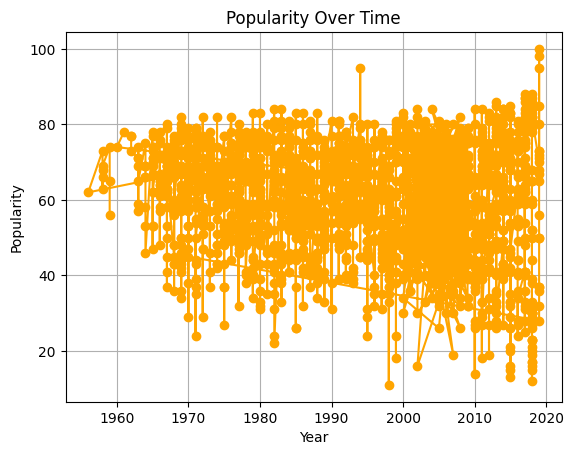

In [11]:
# Zaman Serileri Grafikleri:
if 'Year' in df.columns:
    plt.plot(df['Year'], df['Popularity'], marker='o', linestyle='-', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.title('Popularity Over Time')
    plt.grid()
    plt.show()
else:
    print("Year column not found in the dataset.")

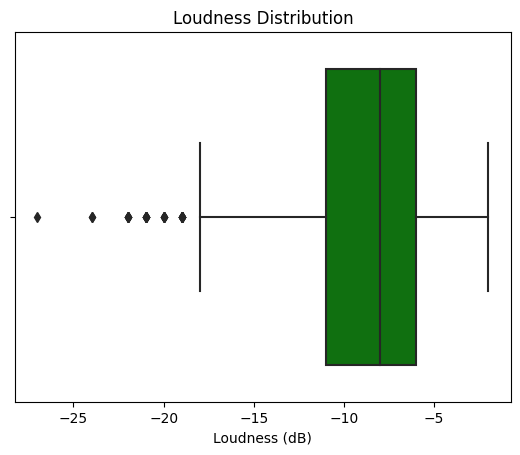

In [12]:
import seaborn as sns
sns.boxplot(x='Loudness (dB)', data=df, color='green')
plt.title('Loudness Distribution')
plt.show()

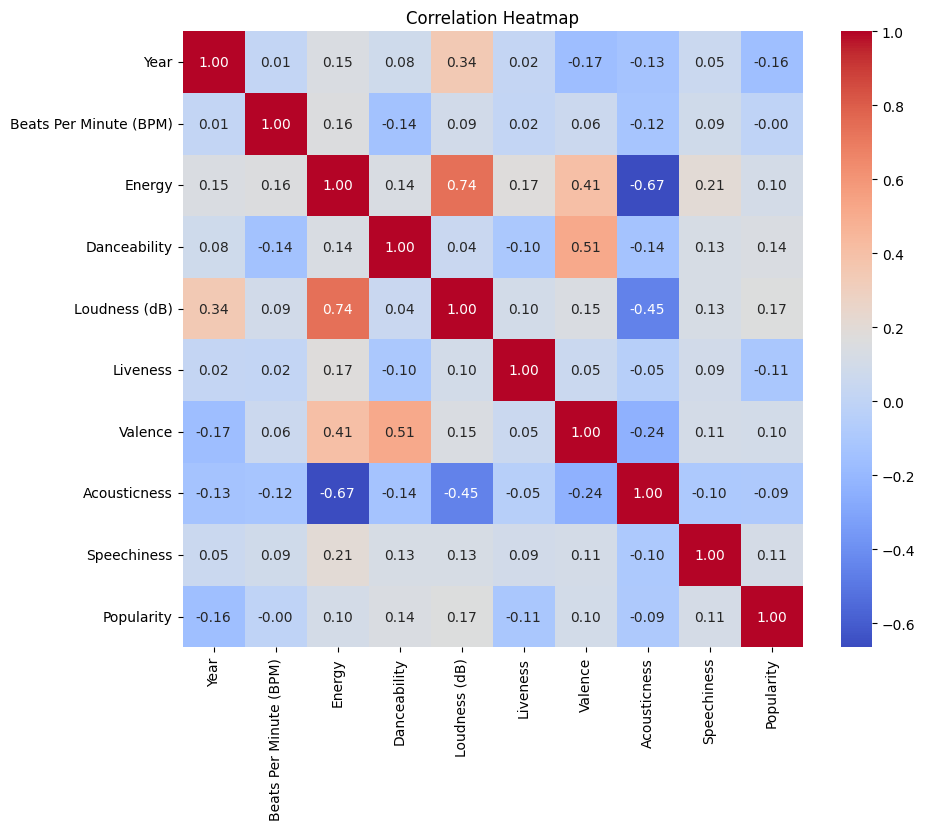

In [13]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 3. **Veriyi Standartlaştırma**:

Bu kod, sadece sayısal sütunları seçer, bir StandardScaler nesnesi oluşturur ve verileri standartlaştırır. Sonuç olarak, df2 adında bir DataFrame oluşturulur ve bu DataFrame, standartlaştırılmış verileri içerir.

Bu işlem sayesinde verileriniz aynı ölçeğe sahip olur ve çoğu kümeleme algoritması bu tür standartlaştırılmış verilerle daha iyi çalışır.

In [14]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırma için sadece sayısal sütunları seçelim
numeric_columns = df.select_dtypes(include=['int64'])

# Standartlaştırma işlemi için bir StandardScaler nesnesi oluşturalım
scaler = StandardScaler()

# Verileri standartlaştıralım
scaled_data = scaler.fit_transform(numeric_columns)

# Standartlaştırılmış verileri yeni bir DataFrame'e ekleyelim
df1 = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# İlk birkaç satırı görüntüleyelim
print(df1.head())

       Year  Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  \
0  0.683156                1.312739 -1.340009     -0.015521      -1.368667   
1  0.434894                0.527616  0.872304     -0.210991      -0.546064   
2  0.496960                1.705301  0.420812      0.831514       0.002338   
3  0.869353                1.883738  1.639841     -0.667086       1.373342   
4  0.559025               -0.507320  1.007752      0.310261       1.099141   

   Liveness   Valence  Acousticness  Speechiness  Popularity  
0 -0.479098  0.748080      2.245908    -0.453358    0.799653  
1 -0.120314  1.271177     -0.408833     0.455637   -1.430623  
2 -0.718286  0.104268     -0.925990     2.728126    0.660261  
3 -0.957475 -0.499305     -0.994944    -0.226109    1.148133  
4 -0.538895  1.512607     -0.960467    -0.453358   -0.036701  


In [15]:
df.corr()['Popularity'].sort_values(ascending=False)

Popularity                1.000000
Loudness (dB)             0.165527
Danceability              0.144344
Speechiness               0.111689
Energy                    0.103393
Valence                   0.095911
Beats Per Minute (BPM)   -0.003181
Acousticness             -0.087604
Liveness                 -0.111978
Year                     -0.158962
Name: Popularity, dtype: float64

## 5. **Kümeleme Analizi**:(Model girdilerini tanımla ve Modelleme)

Veri Noktalarının Gruplandırılması: Her veri noktası, bir küme veya grup ile ilişkilendirilir. Bu, benzer veri noktalarının aynı kümeye atandığını gösterir.

Küme Merkezleri: Her kümenin bir merkezi vardır. Bu merkezler, o kümeye ait veri noktalarının ortalamasını temsil eder.

Küme Sayısı ve Kompozisyonu: Kullanıcı tarafından belirlenen veya otomatik olarak hesaplanan küme sayısı ile her bir kümeye ait veri noktalarının sayısı hakkında bilgi sağlar.

K-Means, verilerin gruplanması ve benzerliklerin belirlenmesi için kullanılan etkili bir yöntemdir. Özellikle veri madenciliği ve desen tanıma uygulamalarında sıkça kullanılır. Elde edilen kümeleme sonuçları, veri analizi ve karar verme süreçlerinde önemli bir rol oynar.

In [16]:
x=df[["Loudness (dB)","Danceability","Speechiness","Energy","Valence"]]

In [30]:
model=KMeans(2)

In [31]:
model=model.fit(x)

In [32]:
pred=model.predict(x)

In [33]:
pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [34]:
silhouette_score(x,pred)

0.36816320395392044

In [35]:
x["cluster"]=pred

In [36]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [37]:
clust(10)

Cluster  2  score:  0.368582715540897
Cluster  3  score:  0.3275014547574635
Cluster  4  score:  0.31085548450372424
Cluster  5  score:  0.27503850708160943
Cluster  6  score:  0.25303774566196524
Cluster  7  score:  0.2415359946447835
Cluster  8  score:  0.24070628913746617
Cluster  9  score:  0.2369263459721679
Cluster  10  score:  0.23575963101236447


Bu ifadeler, kümeleme sonuçlarını değerlendirmek ve uygun küme sayısını seçmek için kullanılan bir metrik olan "Silhouette Skoru" ile ilgilidir.

1. **Silhouette Skoru Nedir?**:
   - Silhouette Skoru, kümeleme sonuçlarının ne kadar iyi olduğunu ölçen bir metriktir. Bu metrik, her bir veri noktasının kendi kümeleri içindeki benzerliğini, diğer kümelerle olan farkına göre karşılaştırır.
   - Silhouette Skoru, -1 ile 1 arasında değer alır.
   - Bir veri noktası, aynı kümedeki diğer noktalara göre daha benzerse, Silhouette Skoru pozitif değere yaklaşır (0'a yaklaşır).
   - Eğer bir veri noktası, diğer kümelerdeki veri noktalarına göre daha benzerse, bu durumda Silhouette Skoru negatif bir değere yaklaşır.
   - Genel olarak, yüksek Silhouette Skoru, kümeleme sonuçlarının iyiliğini gösterir.

2. **Cluster 2, 3, 4, ... Skorları Nedir?**:
   - Bu ifadeler, farklı küme sayıları (2'den 10'a kadar) için hesaplanmış Silhouette Skorlarını göstermektedir.
   - İlk ifade, 2 küme oluşturulduğunda hesaplanan Silhouette Skoru'nu göstermektedir. Yani, verilerin iki farklı kümeye ayrıldığında bu metrik değeri verir.
   - İkinci ifade, 3 küme oluşturulduğunda hesaplanan Silhouette Skoru'nu gösterir ve bu işlem farklı küme sayıları için tekrarlanır.

3. **Sonuçların Yorumu**:
   - Silhouette Skoru, farklı küme sayıları için hesaplandığında, her bir küme sayısı için bir skor elde edilir.
   - Genellikle, yüksek Silhouette Skoru olan küme sayısı, en iyi kümeleme sonucunu temsil eder. Yani, verilerin bu sayıda kümelere ayrılması en iyisi olarak kabul edilir.
   - Bu nedenle, farklı küme sayıları için Silhouette Skorlarını karşılaştırarak, verilerin kaç küme ile en iyi şekilde temsil edilebileceğini belirleyebilirsiniz.
   - Örneğin, 2 küme için skor daha yüksekse, verilerin iki ana kategoriye ayrılması daha iyi olabilir. Ancak, bu karar verilirken problem bağlamınızı ve iş gereksinimlerinizi de göz önünde bulundurmalısınız.

Sonuç olarak, Silhouette Skoru, kümeleme sonuçlarının kalitesini değerlendirmek ve en uygun küme sayısını seçmek için kullanılan bir metriktir. Yüksek bir Silhouette Skoru, verilerin başarılı bir şekilde kümelendiğini ve benzer veri noktalarının aynı kümelerde toplandığını gösterir.

### Yellow Brick

In [38]:
from yellowbrick.cluster import KElbowVisualizer

In [39]:
model=KMeans()

In [40]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

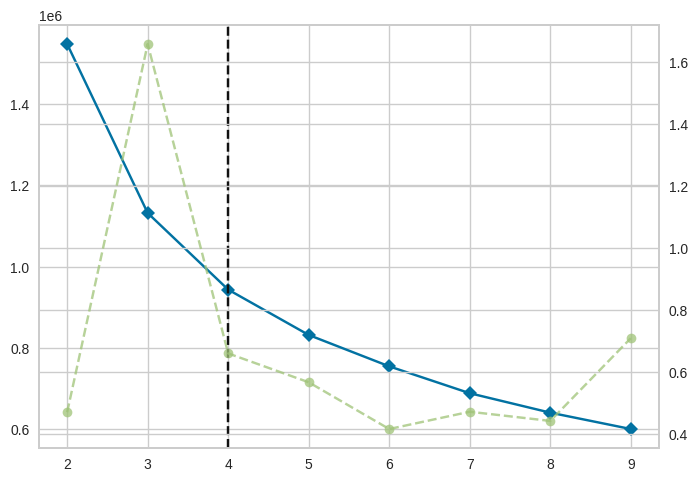

In [41]:
visualizer.fit(x)

In [42]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

## Sonuç Olarak:

Bu proje, müzik türlerini K-Means kümeleme algoritması kullanarak başarılı bir şekilde gruplandırarak, veri analizi ve müzik kategorizasyonunda değerli bir araç sunmaktadır. Elde edilen sonuçlar, müzik endüstrisi veya kullanıcılar için müziği daha iyi anlama ve keşfetme konularında faydalı bilgiler sağlayabilir. Kümeleme analizi, müzik türlerini benzerliklerine göre gruplandırarak, müziğin derinlemesine analizini yapmak ve müzik endüstrisindeki eğilimleri daha iyi anlamak için potansiyel sunmaktadır. Bu proje, müziği daha iyi anlamak ve keşfetmek isteyenlere rehberlik etmek için önemli bir adım olarak kabul edilebilir

Elde ettiğimiz sonuçları müzik türleri açısından yorumlayarak, bu kümeleme analizinin müzik sınıflandırması veya önerileri için nasıl kullanılabileceğini düşünebiliriz.

K-Means kümeleme analizi sonuçlarına dayalı olarak, müzik türlerinin benzer özelliklere sahip olduğunu ve farklılıklarının hangi özelliklere dayandığını belirleyebiliriz. Örneğin, enerji seviyeleri, dans edilebilirlik, akustiklik veya tempo gibi özellikler açısından benzer müzik türleri aynı kümeye atanmış olabilir. Bu sonuçlar, müzik endüstrisindeki birçok uygulama için faydalı olabilir:

1. **Müzik Sınıflandırması**: Bu kümeleme sonuçları, yeni müzik parçalarının türlerini otomatik olarak sınıflandırmak için kullanılabilir. Örneğin, bir müzik servisi yeni eklenen bir şarkının türünü belirlemek için bu özellikleri kullanabilir.

2. **Müzik Önerileri**: Kullanıcıların müzik tercihlerine dayalı olarak, benzer özelliklere sahip şarkıları ve müzik türlerini önermek için bu analizden yararlanılabilir. Örneğin, bir kullanıcı rock müziğini seviyorsa, bu analiz sonuçlarına dayalı olarak benzer rock şarkıları veya türler önerilebilir.

3. **Müzik Endüstrisi Trendleri**: Müzik endüstrisi profesyonelleri, bu analiz sonuçlarına dayalı olarak belirli müzik türlerinin popülerliğini ve eğilimlerini izleyebilirler. Hangi türlerin bir araya geldiğini veya hangi türlerin yükselişte olduğunu belirlemek için bu verileri kullanabilirler.

4. **Müzik Pazarlama ve Tanıtım**: Müzik şirketleri veya sanatçılar, bu analiz sonuçlarına dayalı olarak müziklerini hedef kitlelerine tanıtmak ve pazarlamak için stratejiler geliştirebilirler. Örneğin, enerjik ve dans edilebilir müziği seven bir kitlenin ilgisini çekmek için bu analiz sonuçlarına dayalı olarak reklam kampanyaları oluşturabilirler.

Sonuç olarak, bu kümeleme analizi, müzik türlerini ve özelliklerini daha iyi anlamak ve bu bilgileri müzik sınıflandırması, önerileri, trend analizi ve pazarlama stratejileri için kullanmak için değerli bir kaynak olabilir. Bu analiz, müzik endüstrisine ve müzik dinleyicilerine daha iyi hizmet vermek için potansiyel fırsatlar sunmaktadır.

### Ayrıca:
Müzik türleri (Top Genre) gibi kategorik verileri K-Means gibi kümeleme algoritmalarına girdi olarak vermek için bu verileri one-hot encoding'e dönüştürmeniz gerekebilir. One-hot encoding, kategorik verileri sayısal formata dönüştürmek için kullanılır ve her kategoriye ait bir sütun oluşturur, bu sütunlarda ilgili kategori için 1 veya 0 değerleri bulunur.
Ve kime modellemesine bu şekilde de verilebilir.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# K-Means sonuçlarını içeren 'clusters' dizisi
# x veri çerçevesi içinde bu diziyi oluşturduğunuzu varsayalım
# Bu diziyi clusters adıyla oluşturduk
clusters = [2, 3, 0, 1, 2, 0, 4, 3, 5, 5]  # Örnek olarak küme numaralarını içerir

# Özellikler
loudness = x["Loudness (dB)"]
danceability = x["Danceability"]
speechiness = x["Speechiness"]
energy = x["Energy"]
valence = x["Valence"]

# 3D grafiği oluşturun
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Her veri noktasını uygun küme rengine göre görselleştirin
for i in range(len(clusters)):
    if clusters[i] == 0:
        ax.scatter(loudness[i], danceability[i], speechiness[i], c='red', marker='o')
    elif clusters[i] == 1:
        ax.scatter(loudness[i], danceability[i], speechiness[i], c='blue', marker='^')
    elif clusters[i] == 2:
        ax.scatter(loudness[i], danceability[i], speechiness[i], c='green', marker='s')
    # Daha fazla küme rengi ve işareti eklemeye devam edebilirsiniz

# Eksen etiketleri
ax.set_xlabel("Loudness (dB)")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")

plt.show()

Bu Python kodu, 3D bir sahnede veri noktalarını görselleştirmek için kullanılır ve temel olarak şu adımları içerir:

1. İlk olarak, `matplotlib` ve `mpl_toolkits.mplot3d` kütüphaneleri içe aktarılır. Bu kütüphaneler, 3D grafik oluşturmak ve görselleştirmek için kullanılır.

2. Örnek bir "clusters" dizisi oluşturulur. Bu dizi, her veri noktasının hangi küme (cluster) içinde olduğunu temsil eder. Yani, her veri noktası bir küme numarası ile ilişkilendirilir.

3. Veri çerçevesi içerisinden "Loudness (dB)", "Danceability", "Speechiness", "Energy" ve "Valence" adlı özelliklerin değerleri çıkartılır. Bu özellikler, 3D grafikte eksenler olarak kullanılacak olan verileri temsil eder.

4. Bir 3D grafik sahnesi (`fig`) ve bu sahneye ait bir alt-çizim (`ax`) oluşturulur. Bu, 3D grafik üzerinde çizim yapmak için gerekli birinci adımdır.

5. Döngü içinde, her bir veri noktası için aşağıdaki işlemler gerçekleştirilir:
   - Veri noktasının hangi küme içinde olduğu kontrol edilir ve uygun küme rengine göre belirli bir işaret (marker) ile birlikte 3D grafikte çizilir.
   - Örneğin, eğer bir veri noktası "0" numaralı küme içinde ise, bu nokta kırmızı renkte bir daire ("o" marker) ile görselleştirilir.

6. Eksen etiketleri belirtilir. "Loudness (dB)" ekseni x ekseni olarak, "Danceability" ekseni y ekseni olarak ve "Speechiness" ekseni z ekseni olarak etiketlenir.

7. Son olarak, `plt.show()` işlevi ile 3D grafik penceresi görüntülenir.

Bu kod, verileri kümeleme sonuçlarına göre 3D bir grafikte görselleştirmenize olanak tanır ve veri noktalarının hangi kümelere ait olduğunu renk ve işaretlerle gösterir. Bu, kümeleme sonuçlarını daha iyi anlamak ve görsel olarak incelemek için kullanışlıdır.